
### Enter Patient Data ###


Age:  23
Sex (1=Male, 0=Female):  0
Chest Pain Type (0-3):  2
Resting Blood Pressure:  117
Cholesterol Level:  234
Fasting Blood Sugar > 120 mg/dl (1=True, 0=False):  0
Resting ECG (0-2):  1
Max Heart Rate Achieved:  93
Exercise-Induced Angina (1=Yes, 0=No):  0
ST Depression:  0
Slope of ST Segment (0-2):  2
Number of Major Vessels (0-3):  1
Thalassemia (0-3):  2



### Diagnosis Result ###
You have Heart Disease

### Model Accuracy ###
83.61%

### Comparative Analysis ###


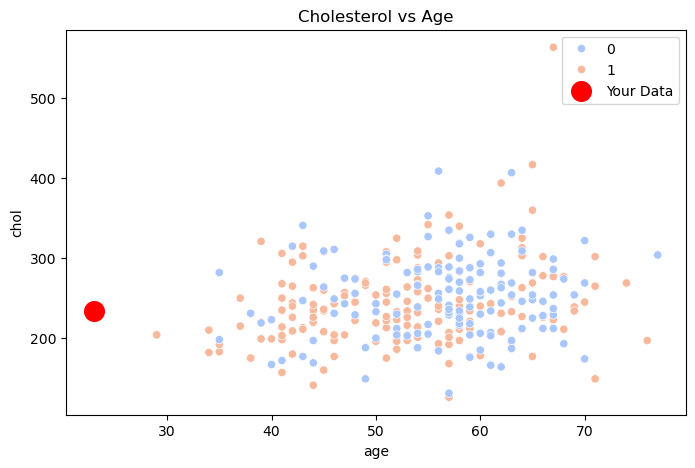

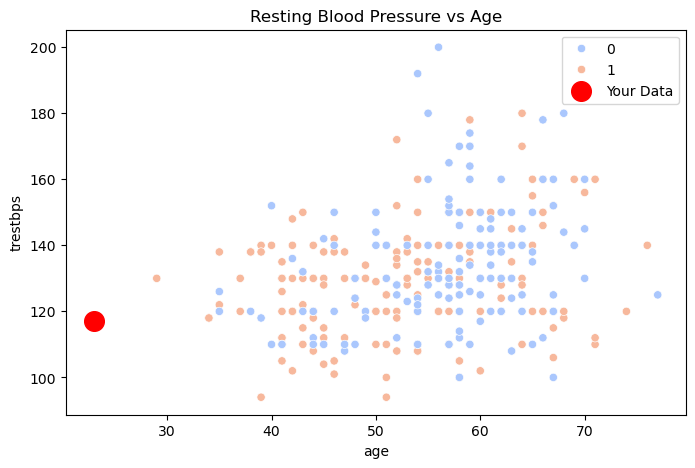

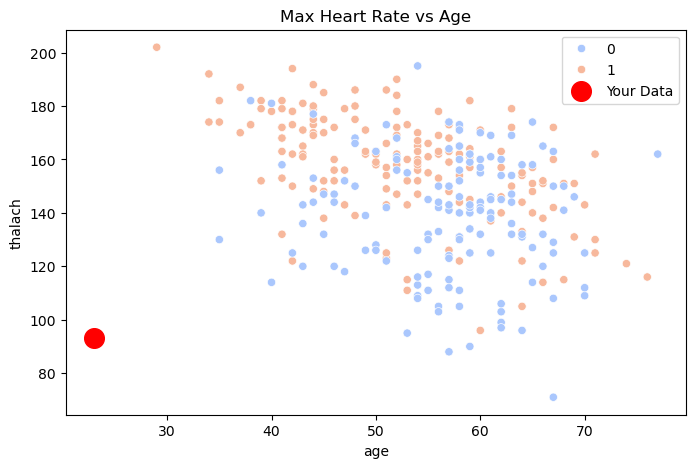

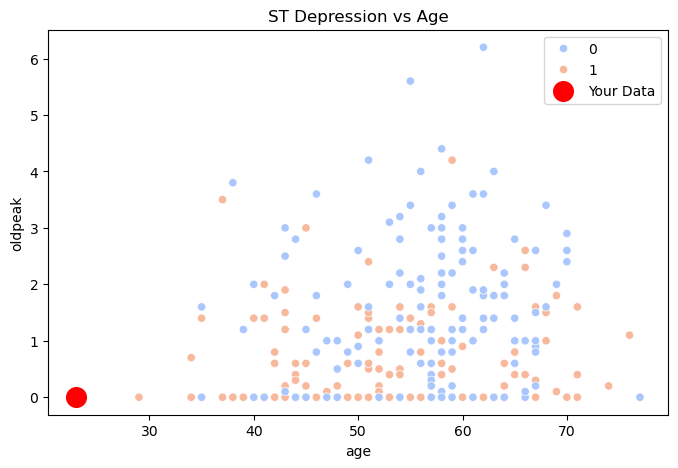

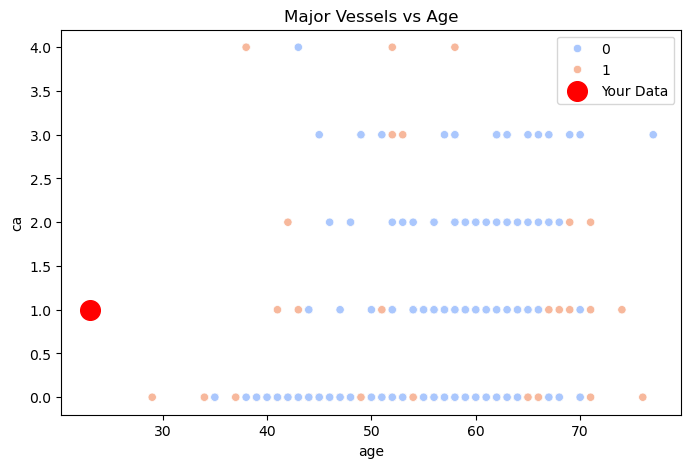

In [9]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ensure graphs display in Jupyter Notebook
%matplotlib inline

# Load dataset
df = pd.read_csv("hddata.csv")  # Replace with your actual CSV file path

# Split features and target
X = df.drop(['target'], axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
pickle.dump(model, open("heart_disease_model.pkl", "wb"))

# Load the saved model
model = pickle.load(open("heart_disease_model.pkl", "rb"))

# Get user input for prediction
def user_report():
    print("\n### Enter Patient Data ###")
    age = int(input("Age: "))
    sex = int(input("Sex (1=Male, 0=Female): "))
    cp = int(input("Chest Pain Type (0-3): "))
    trestbps = int(input("Resting Blood Pressure: "))
    chol = int(input("Cholesterol Level: "))
    fbs = int(input("Fasting Blood Sugar > 120 mg/dl (1=True, 0=False): "))
    restecg = int(input("Resting ECG (0-2): "))
    thalach = int(input("Max Heart Rate Achieved: "))
    exang = int(input("Exercise-Induced Angina (1=Yes, 0=No): "))
    oldpeak = float(input("ST Depression: "))
    slope = int(input("Slope of ST Segment (0-2): "))
    ca = int(input("Number of Major Vessels (0-3): "))
    thal = int(input("Thalassemia (0-3): "))

    user_data = pd.DataFrame({
        'age': [age], 'sex': [sex], 'cp': [cp], 'trestbps': [trestbps],
        'chol': [chol], 'fbs': [fbs], 'restecg': [restecg], 'thalach': [thalach],
        'exang': [exang], 'oldpeak': [oldpeak], 'slope': [slope], 'ca': [ca], 'thal': [thal]
    })
    return user_data

# Get user input
user_data = user_report()

# Prediction
user_result = model.predict(user_data)

# OUTPUT
result_text = 'You have Heart Disease' if user_result[0] == 1 else 'You are Healthy'
print("\n### Diagnosis Result ###")
print(result_text)

# Model Accuracy
accuracy = accuracy_score(y_test, model.predict(X_test)) * 100
print("\n### Model Accuracy ###")
print(f"{accuracy:.2f}%")

# Visualizations
def plot_graph(x_feature, y_feature, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df['target'], palette='coolwarm')
    plt.scatter(user_data[x_feature], user_data[y_feature], color='red', s=200, label="Your Data")
    plt.title(title)
    plt.legend()
    plt.show()

# Generate graphs
print("\n### Comparative Analysis ###")
plot_graph('age', 'chol', 'Cholesterol vs Age')
plot_graph('age', 'trestbps', 'Resting Blood Pressure vs Age')
plot_graph('age', 'thalach', 'Max Heart Rate vs Age')
plot_graph('age', 'oldpeak', 'ST Depression vs Age')
plot_graph('age', 'ca', 'Major Vessels vs Age')
